In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [118]:
df = pd.read_csv("Final_Data_Merge_ESG.csv")
df['Date'] = pd.to_datetime(df['Date'])
# change object data types to numeric
df['COUPON RATE'] = pd.to_numeric(df['COUPON RATE'],errors = 'coerce')

# make MATURITY DATE same time format
df['MATURITY DATE'] = pd.to_datetime(df['MATURITY DATE'])

df.head()

,Unnamed: 0,Unnamed: 0.1,NCB,Date,ISIN,ISSUER,MATURITY DATE,COUPON RATE,MONTH_YEAR,MONTHS,...,Compustat,Country,Climate Watch,International Energy Agency,GHG_Total_CW,GHG_IEA_Share,Emissions,Resource Use,Innovation,Total Environment
0,0,0,IT,2017-06-23,XS0859920406,A2A S.p.A.,2019-11-28,4.500,2017-06,2017-06-30,...,1.0,Italy,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,95.0,91.0,91.0,93.0
1,1,1,IT,2017-06-23,XS0951567030,A2A S.p.A.,2021-10-01,4.375,2017-06,2017-06-30,...,1.0,Italy,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,95.0,91.0,91.0,93.0
2,2,2,IT,2017-06-23,XS1004874621,A2A S.p.A.,2022-01-13,3.625,2017-06,2017-06-30,...,1.0,Italy,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,95.0,91.0,91.0,93.0
3,3,3,IT,2017-06-23,XS1195347478,A2A S.p.A.,2025-02-25,1.750,2017-06,2017-06-30,...,1.0,Italy,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,95.0,91.0,91.0,93.0
4,4,4,IT,2017-06-23,XS1581375182,A2A S.p.A.,2024-03-16,1.250,2017-06,2017-06-30,...,1.0,Italy,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,95.0,91.0,91.0,93.0


In [6]:
# change object data types to numeric
df['COUPON RATE'] = pd.to_numeric(df['COUPON RATE'],errors = 'coerce')

# make MATURITY DATE same time format
df['MATURITY DATE'] = pd.to_datetime(df['MATURITY DATE'])

In [7]:
df.set_index('Date', inplace=True)

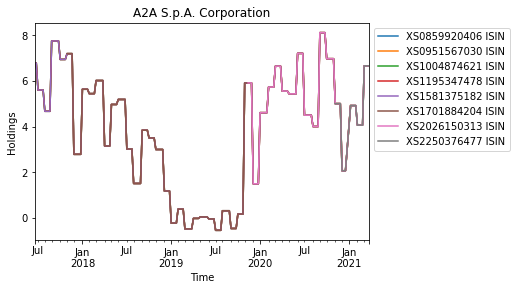

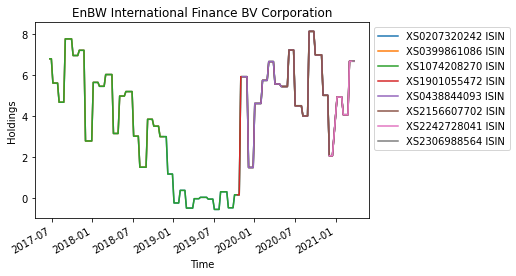

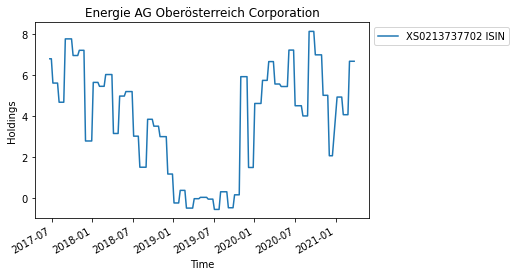

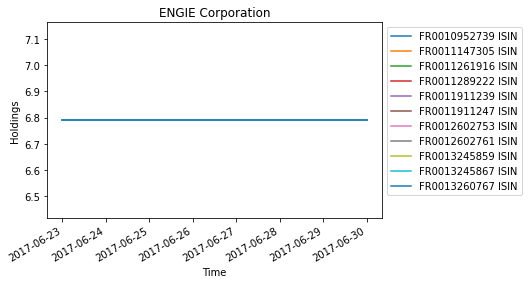

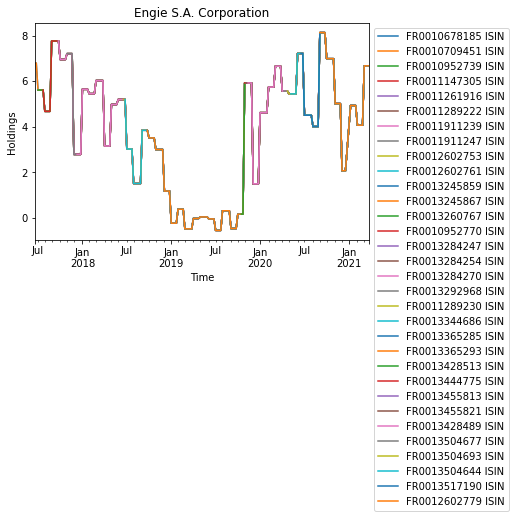

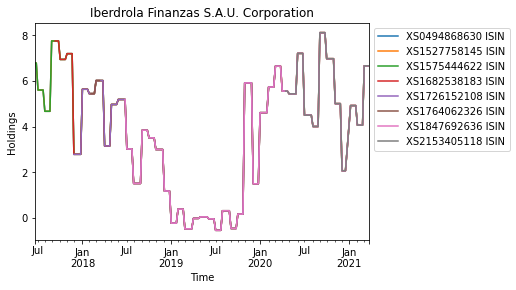

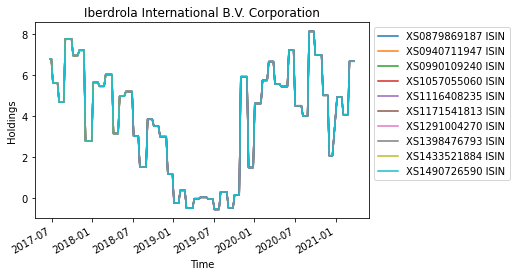

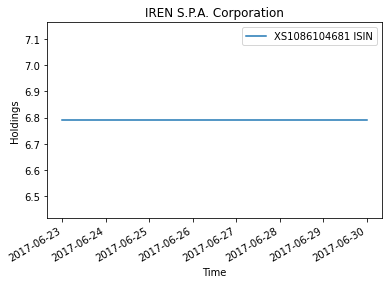

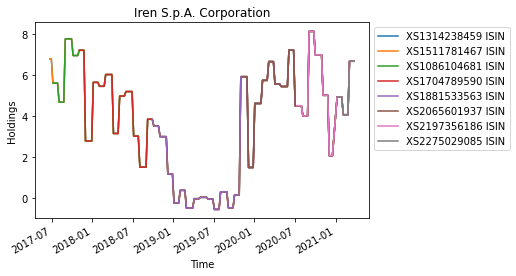

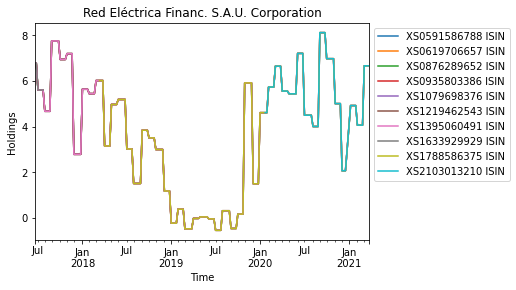

In [25]:
issuers = df.ISSUER.unique()
#just first 10 companies
issuers = issuers[0:10]
isins = df.ISIN.unique()

for j in issuers:
    unit = df.loc[df['ISSUER']==j]
    units = unit.ISIN.unique()
    
    for i in units:
        unit.loc[unit['ISIN'] == i]['HOLDINGS'].plot(label= '%s ISIN' % i)
        
          
        plt.ylabel('Holdings')
        plt.xlabel('Time')
        plt.title('%s Corporation' % j)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show() 

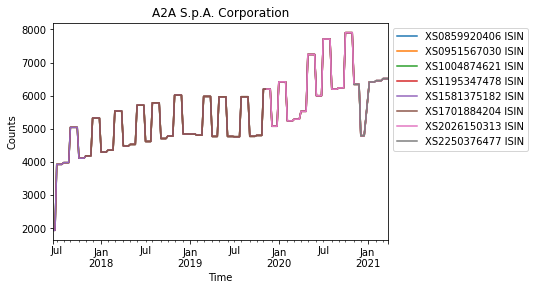

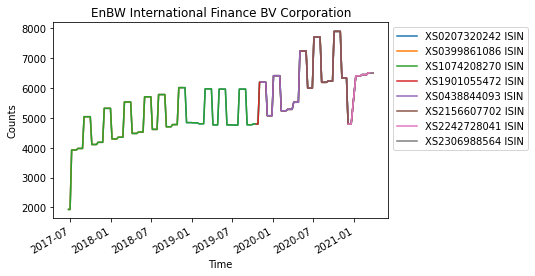

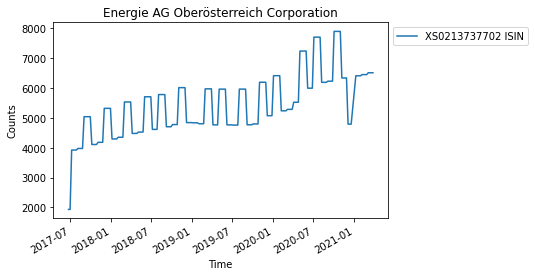

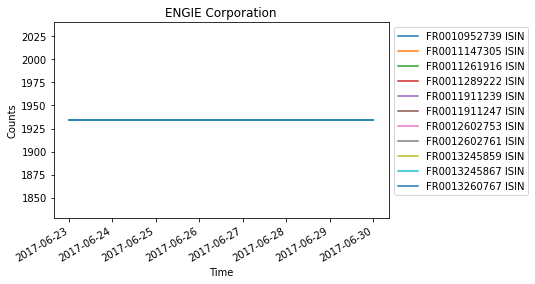

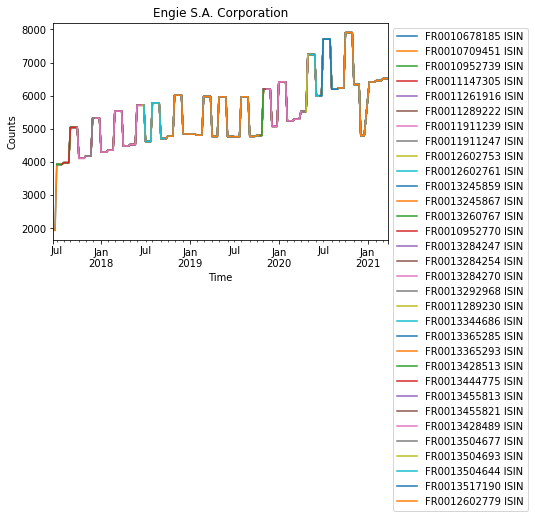

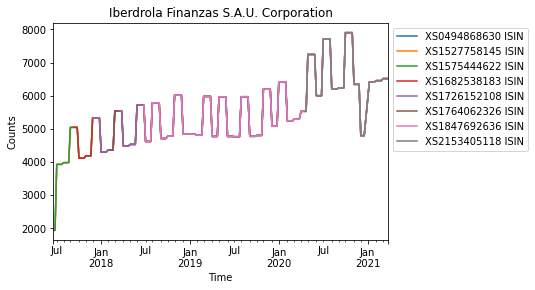

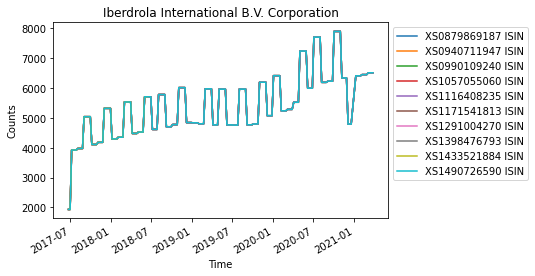

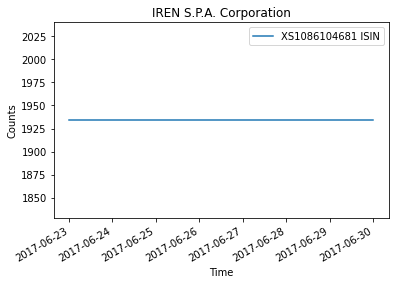

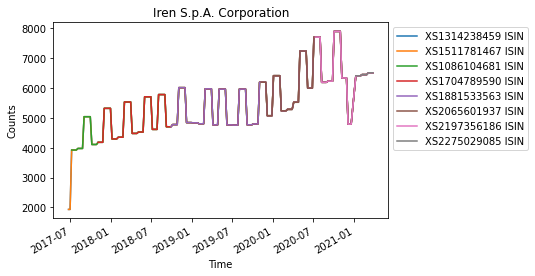

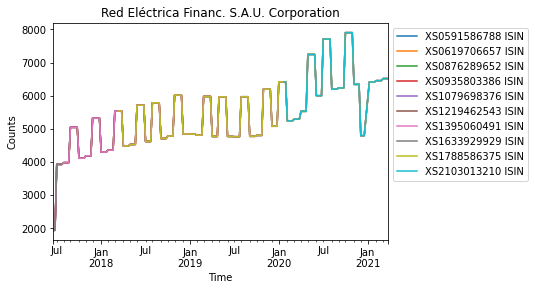

In [24]:
issuers = df.ISSUER.unique()
issuers = issuers[0:10]
isins = df.ISIN.unique()

for j in issuers:
    unit = df.loc[df['ISSUER']==j]
    units = unit.ISIN.unique()
    
    for i in units:
        unit.loc[unit['ISIN'] == i]['COUNT'].plot(label= '%s ISIN' % i)
        
          
        plt.ylabel('Counts')
        plt.xlabel('Time')
        plt.title('%s Corporation' % j)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show() 

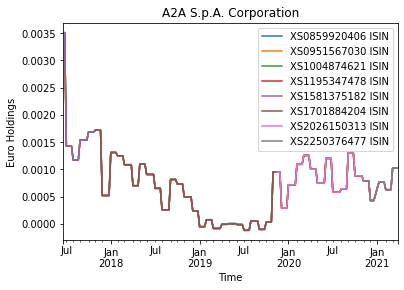

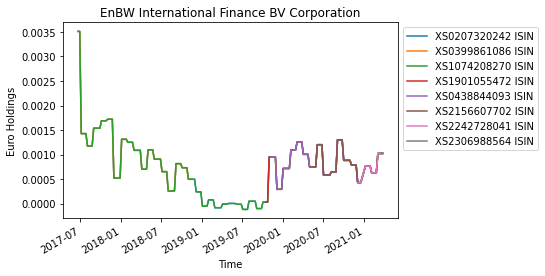

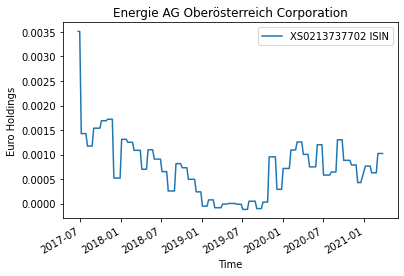

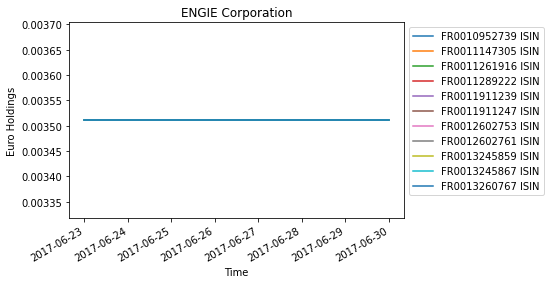

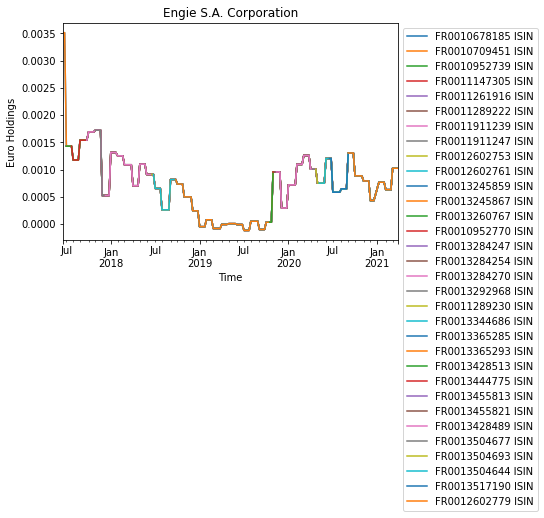

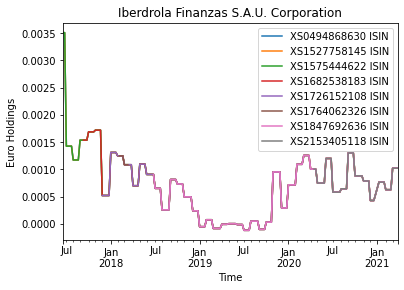

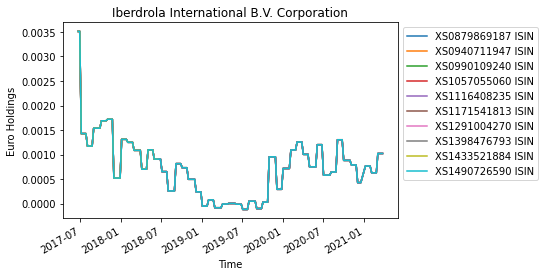

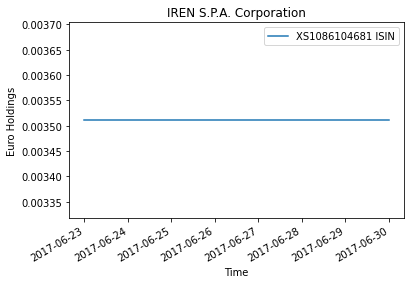

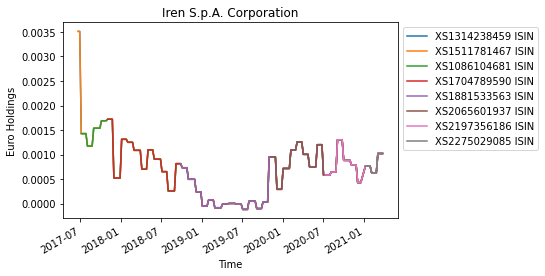

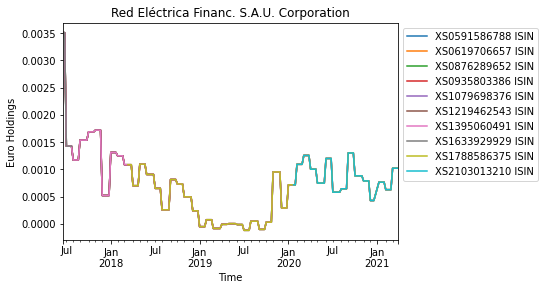

In [23]:
issuers = df.ISSUER.unique()
#just first 10 companies
issuers = issuers[0:10]
isins = df.ISIN.unique()

for j in issuers:
    unit = df.loc[df['ISSUER']==j]
    units = unit.ISIN.unique()
    
    for i in units:
        unit.loc[unit['ISIN'] == i]['EURO HOLDING'].plot(label= '%s ISIN' % i)
        
          
        plt.ylabel('Euro Holdings')
        plt.xlabel('Time')
        plt.title('%s Corporation' % j)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show() 

In [119]:
# Clean Data
data = df.loc[:, ~df.columns.str.contains('^Unnamed')] # Drop unnamed columns
data = data.filter(items=['ISSUER', 'EURO HOLDING', 'Climate Watch', 'International Energy Agency',
                          'GHG_Total_CW', 'GHG_IEA_Share',
                          'Emissions', 'Resource Use', 'Innovation', 'Total Environment','Country']) # filter for relevant columns

data = data.groupby(by=['ISSUER', 'Climate Watch', 'International Energy Agency',
                        'GHG_Total_CW', 'GHG_IEA_Share', 'Emissions', 'Resource Use',
                        'Innovation', 'Total Environment','Country'], as_index=False).sum() # sum bond purchases per company 
data['EURO HOLDING'] = data['EURO HOLDING'].apply(lambda x: (x*100)) # rescale bond purchases from Mio EURO to 10k EURO
data

,ISSUER,Climate Watch,International Energy Agency,GHG_Total_CW,GHG_IEA_Share,Emissions,Resource Use,Innovation,Total Environment,Country,EURO HOLDING
0,A2A S.p.A.,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,95.0,91.0,91.0,93.0,Italy,82.969201
1,ACEA S.p.A.,Electricity/Heat,Oil & Natural Gas,1108.45,3.9,85.0,96.0,84.0,88.0,Italy,67.253028
2,"ACS Servicios Comunicaciones y Energia, S.L.",Industrial Processes,Other industry,166.07,10.6,72.0,77.0,81.0,77.0,Spain,0.250323
3,"ACS Servicios Comunicaciones y Energia, S.L., ...",Industrial Processes,Other industry,166.07,10.6,72.0,77.0,81.0,77.0,Spain,7.448804
4,"ACS Servicios, Comunicaciones y Energia SL",Industrial Processes,Other industry,166.07,10.6,72.0,77.0,81.0,77.0,Spain,0.693066
...,...,...,...,...,...,...,...,...,...,...,...
199,Wendel S.A.,Industrial Processes,Commercial,166.07,6.6,100.0,89.0,37.0,78.0,France,37.511388
200,Whirlpool EMEA Finance SARL,Electricity/Heat,Residential,1108.45,10.9,79.0,91.0,89.0,86.0,Luxembourg,4.563052
201,Whirlpool Finance Luxembourg S.a.r.l.,Electricity/Heat,Residential,1108.45,10.9,79.0,91.0,89.0,86.0,Luxembourg,25.465533
202,"Worldline S.A., Bezons",Electricity/Heat,Commercial,1108.45,6.6,93.0,94.0,50.0,79.0,France,5.853874


In [124]:
df2 = data[['Climate Watch','EURO HOLDING']]

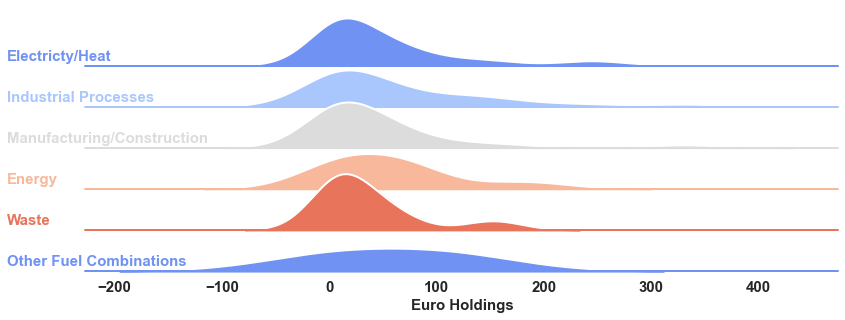

In [126]:
# we generate a color palette with Seaborn.color_palette()
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

month_dict = {1: 'Electricty/Heat',
              2: 'Industrial Processes',
              3: 'Manufacturing/Construction',
              4: 'Energy',
              5: 'Waste',
              6: 'Other Fuel Combinations'}



pal = sns.color_palette(palette='coolwarm', n_colors=5)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(df2, row='Climate Watch', hue='Climate Watch', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'EURO HOLDING',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'EURO HOLDING', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-300, 0.001, month_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Euro Holdings', fontweight='bold', fontsize=15)
#g.fig.suptitle('Daily average temperature in Seattle per month',
 #              ha='right',
 #              fontsize=20,
 #              fontweight=20)

plt.show()

In [94]:
df3 = data[['Climate Watch','Total Environment']]

/home/lukabeverin/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/lukabeverin/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


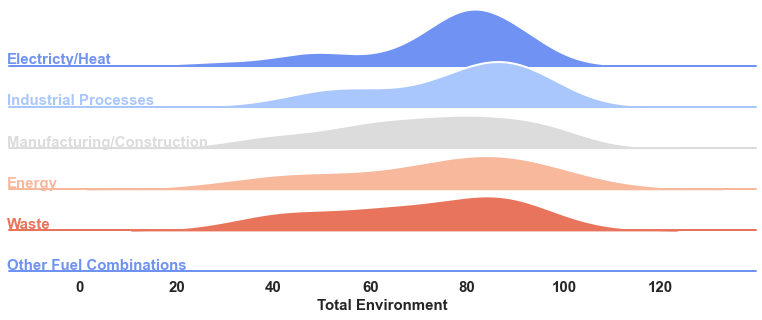

In [100]:
# we generate a color palette with Seaborn.color_palette()
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

month_dict = {1: 'Electricty/Heat',
              2: 'Industrial Processes',
              3: 'Manufacturing/Construction',
              4: 'Energy',
              5: 'Waste',
              6: 'Other Fuel Combinations'}



pal = sns.color_palette(palette='coolwarm', n_colors=5)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(df3, row='Climate Watch', hue='Climate Watch', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'Total Environment',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'Total Environment', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.001, month_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Total Environment', fontweight='bold', fontsize=15)
#g.fig.suptitle('Daily average temperature in Seattle per month',
 #              ha='right',
 #              fontsize=20,
 #              fontweight=20)

plt.show()

In [103]:
df4 = data[['Climate Watch','Emissions']]

/home/lukabeverin/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/lukabeverin/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


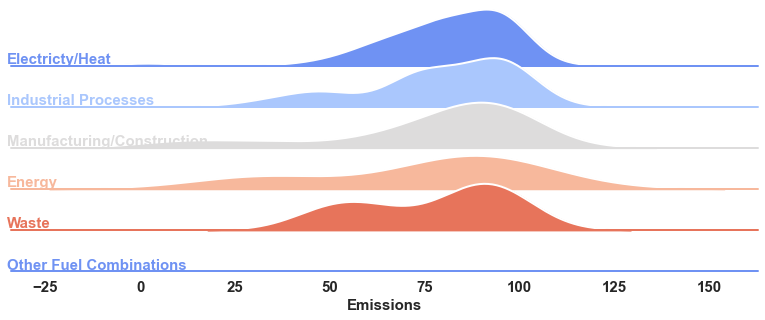

In [108]:
# we generate a color palette with Seaborn.color_palette()
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

month_dict = {1: 'Electricty/Heat',
              2: 'Industrial Processes',
              3: 'Manufacturing/Construction',
              4: 'Energy',
              5: 'Waste',
              6: 'Other Fuel Combinations'}



pal = sns.color_palette(palette='coolwarm', n_colors=5)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(df4, row='Climate Watch', hue='Climate Watch', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'Emissions',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'Emissions', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-35, 0.001, month_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Emissions', fontweight='bold', fontsize=15)
#g.fig.suptitle('Daily average temperature in Seattle per month',
 #              ha='right',
 #              fontsize=20,
 #              fontweight=20)

plt.show()

<AxesSubplot:xlabel='EURO HOLDING', ylabel='Emissions'>

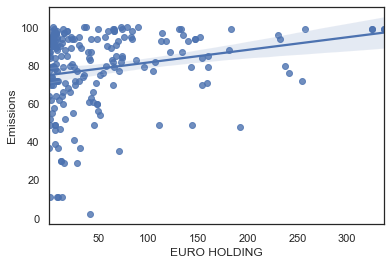

In [123]:
sns.regplot(x=data["EURO HOLDING"], y=data["Emissions"])

In [130]:
sum_holdings = pd.DataFrame(data.groupby("Climate Watch")['EURO HOLDING'].sum())
sum_holdings.columns = ['Euro Holdings']
sum_holdings

,Euro Holdings
Climate Watch,
Electricity/Heat,3272.777396
Energy,454.148269
Industrial Processes,3765.839917
Manufacturing/Construction,2448.993790
Other Fuel Combustion,116.452189
Waste,660.686055


In [131]:
sum_holdings_country = pd.DataFrame(data.groupby("Country")['EURO HOLDING'].sum())
sum_holdings_country.columns = ['Euro Holdings']
sum_holdings_country

,Euro Holdings
Country,
Austria,93.628848
Belgium,483.082447
Finland,205.767031
France,2612.415340
Germany,2886.443835
Germany,8.167339
Ireland,24.041670
Italy,931.625768
Luxembourg,311.330919


In [137]:
hello = data.pivot(columns='Climate Watch',
                     values='EURO HOLDING')

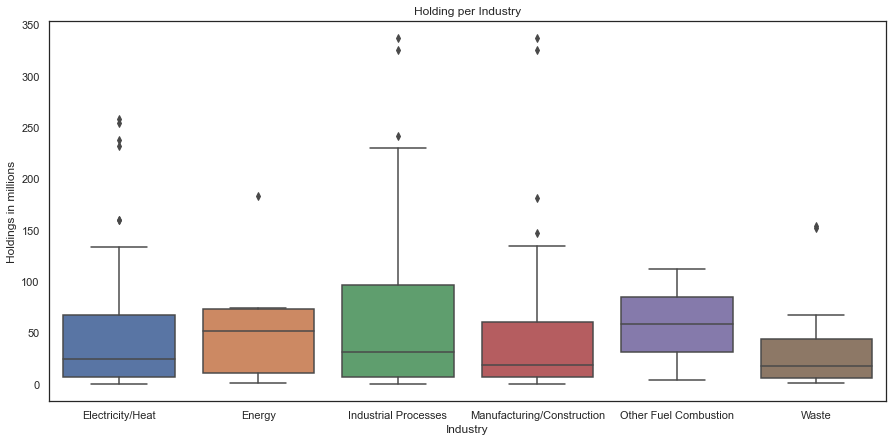

In [141]:
fig, ax = plt.subplots(figsize = (15, 7))
sns.boxplot(ax = ax,data=hello).set_title('Holding per Industry')
plt.xlabel('Industry')
plt.ylabel('Holdings in millions')
plt.show()